<a href="https://colab.research.google.com/github/mohitsbh/Ai_Learn_codes/blob/main/fakereviewdetector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded=files.upload()

Saving fake reviews dataset.csv to fake reviews dataset.csv


In [3]:
import pandas as pd

df=pd.read_csv('fake reviews dataset.csv')
print(df.head())

             category  rating label  \
0  Home_and_Kitchen_5     5.0    CG   
1  Home_and_Kitchen_5     5.0    CG   
2  Home_and_Kitchen_5     5.0    CG   
3  Home_and_Kitchen_5     1.0    CG   
4  Home_and_Kitchen_5     5.0    CG   

                                               text_  
0  Love this!  Well made, sturdy, and very comfor...  
1  love it, a great upgrade from the original.  I...  
2  This pillow saved my back. I love the look and...  
3  Missing information on how to use it, but it i...  
4  Very nice set. Good quality. We have had the s...  


In [4]:
df.describe()

,rating
count,40432.000000
mean,4.256579
std,1.144354
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [6]:
df.label.value_counts()

,count
label,
CG,20216
OR,20216


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40432 entries, 0 to 40431
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  40432 non-null  object 
 1   rating    40432 non-null  float64
 2   label     40432 non-null  object 
 3   text_     40432 non-null  object 
dtypes: float64(1), object(3)
memory usage: 1.2+ MB


In [14]:
df.isnull().sum()

,0
category,0
rating,0
label,0
text_,0
clean_text,0


In [22]:
import re
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:

def text_clean(text):
  text=re.sub(r'[^a-zA-Zs]','',text.lower())
  text=re.sub(r's+','',text).strip()
  return text

df['clean_text']=df['text_'].apply(text_clean)


In [24]:
X=df['text_']
y=df['label']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

vectorizer=TfidfVectorizer(max_features=5000,stop_words='english',ngram_range=(1,2))
X_train_vec=vectorizer.fit_transform(X_train)
X_test_vec=vectorizer.transform(X_test)

model=LogisticRegression(max_iter=1000)
model.fit(X_train_vec,y_train)
y_pred=model.predict(X_test_vec)

accuracy=accuracy_score(y_test,y_pred)
classification=classification_report(y_test,y_pred)
confusion=confusion_matrix(y_test,y_pred)

print('Accuracy :', accuracy)
print('Classification Report:', classification)
print('Confusion Matrix:', confusion)

Accuracy : 0.8781995795721529
Classification Report:               precision    recall  f1-score   support

          CG       0.89      0.87      0.88      4044
          OR       0.87      0.89      0.88      4043

    accuracy                           0.88      8087
   macro avg       0.88      0.88      0.88      8087
weighted avg       0.88      0.88      0.88      8087

Confusion Matrix: [[3505  539]
 [ 446 3597]]


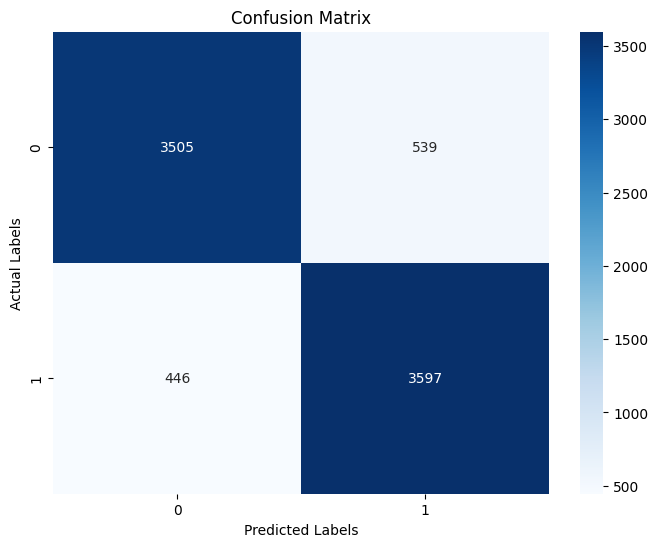

In [26]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()

In [27]:
joblib.dump(model,'fake_review_model.pkl')
joblib.dump(vectorizer,'vectorizer.pkl')
print('model saved')

model saved


In [29]:
model.predict(vectorizer.transform(['Tis product is nice']))

array(['CG'], dtype=object)

In [30]:
model.predict(vectorizer.transform(['Good product, work as expected.']))

array(['OR'], dtype=object)